# Video: Plotting Histograms with Pandas

In this video, we will explore pandas options for plotting histograms.
Pandas gives histogram special treatment compared to most plot types with a specialized `hist` function and built-in subplot support.


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

Script:
* Earlier in this module, we used Matplotlib to visualize data.
* We will now look at the visualization support of pandas.
* Pandas visualization is built on top of Matplotlib, so the resulting charts will look similar to Matplotlib charts, and often can be tweaked using Matplotlib functions.
* Let's get started.

In [ ]:
abalone = pd.read_csv("https://raw.githubusercontent.com/bu-cds-omds/dx602-examples/main/data/abalone.tsv", sep="\t")
abalone

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


Script:
* We will use the abalone data set again.
* Let's start with the dataframe hist method to see the distributions for each column.

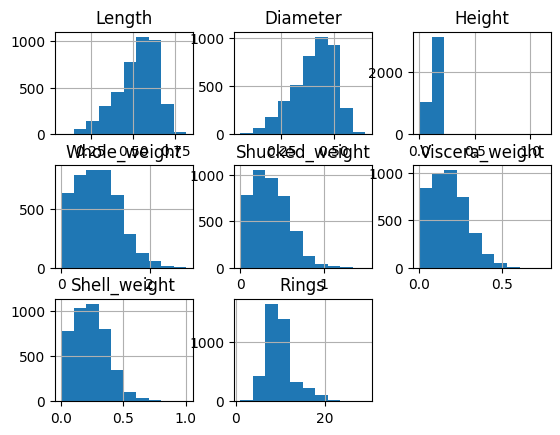

In [ ]:
abalone.hist()
None

Script:
* As is common with Matplotlib subplots, the labels are overlapping.
* The usual Matplotlib adjustment will clean that up.


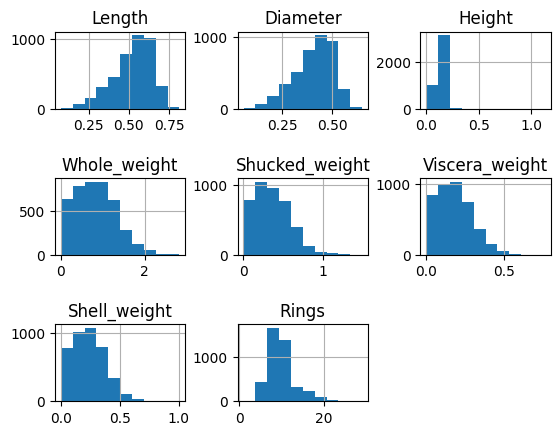

In [ ]:
abalone.hist()
plt.subplots_adjust(wspace=0.4, hspace=0.9)

Script:
* I'll include that as needed for later plots in this video.
* The data frame hist function has a number of its own options for tweaking the output.
* The built-in documentation can give you a quick overview.

In [ ]:
print(abalone.hist.__doc__)


    Make a histogram of the DataFrame's columns.

    A `histogram`_ is a representation of the distribution of data.
    This function calls :meth:`matplotlib.pyplot.hist`, on each series in
    the DataFrame, resulting in one histogram per column.

    .. _histogram: https://en.wikipedia.org/wiki/Histogram

    Parameters
    ----------
    data : DataFrame
        The pandas object holding the data.
    column : str or sequence, optional
        If passed, will be used to limit data to a subset of columns.
    by : object, optional
        If passed, then used to form histograms for separate groups.
    grid : bool, default True
        Whether to show axis grid lines.
    xlabelsize : int, default None
        If specified changes the x-axis label size.
    xrot : float, default None
        Rotation of x axis labels. For example, a value of 90 displays the
        x labels rotated 90 degrees clockwise.
    ylabelsize : int, default None
        If specified changes the y-axis lab

Script:
* Usually I prefer the web documentation, but if you are in a notebook environment, checking the doc string is faster.
* One option of note in there is figsize.
* Previously, a separate call to the Matplotlib figure function was needed to set that.
* And another is the grid option since pandas had the gridlines on by default, while Matplotlib usually has those off.
* Here's an example using those now.

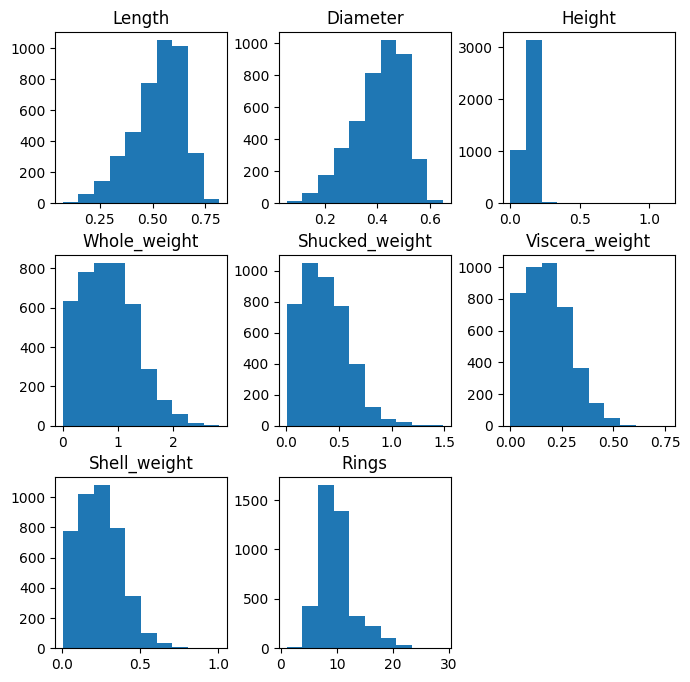

In [ ]:
abalone.hist(figsize=(8, 8), grid=False)
None

Script:
* That looks decent without the call to subplots_adjust.
* Another optional argument to the dataframe hist method is "by" which splits up the data into charts using a particular columns value.

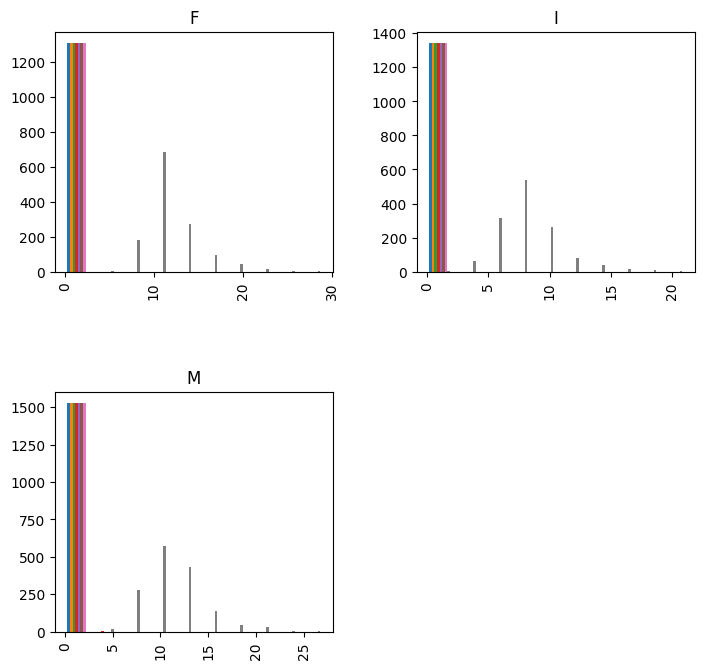

In [ ]:
_ = abalone.hist(by="Sex", figsize=(8, 8), grid=False)

Script:
* This splits up the charts by sex, and plots each of the other columns with different colors in the same histogram.
* Also there is no legend by default, so how do you know which color is which?
* There is a legend option that you can set to add a legend, but I personally think this combined histogram is a bad match for this dataset.
* Most of the values except the rings column are less than one, so they get smushed together on the right.
* Those tall columns are saying that those columns have essentially all their values below in that bucket.
* Let's make a better chart instead.
* One way we can improve this chart is to filter it down to just two columns.
* One column to split the charts, and one to look at with histograms.

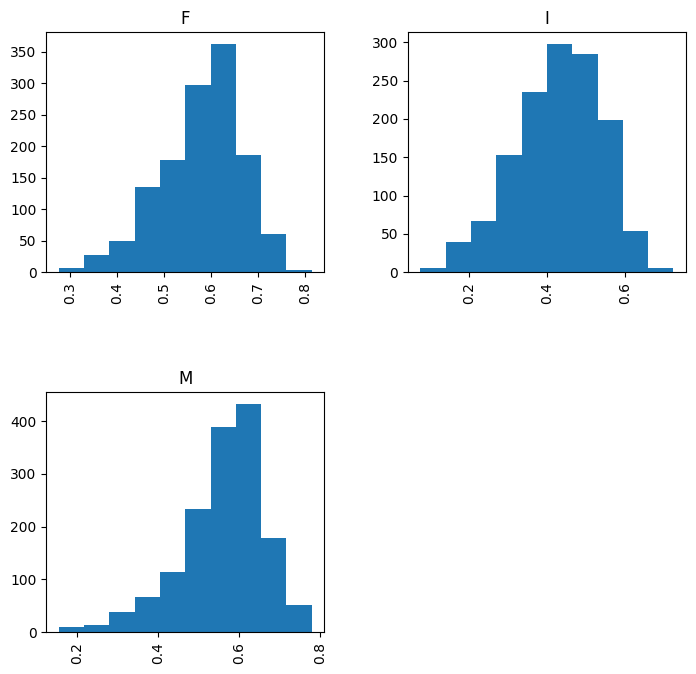

In [ ]:
_ = abalone[["Sex", "Length"]].hist(by="Sex", figsize=(8, 8), grid=False)

Script:
* Here, the histograms are just showing length data with separate charts for each sex.
* A possible tweak here would be to share the x-axis for easier comparison, but lets move on.
* There's a separate hist function that you can access via the dataframe dot plot dot hist, but I'm not too fond of it.
* I'll show you why.

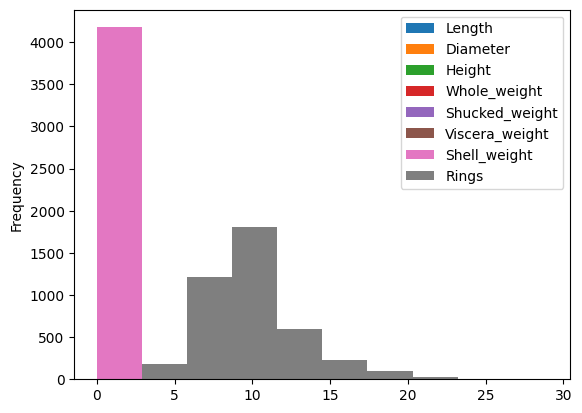

In [ ]:
_ = abalone.plot.hist()

Script:
* It's default behavior has similar weakneses to the direct hist method using the by argument.
* The different ranges of these columns is again a problem, with every column but rings being squeezed into the leftmost bucket.
* And worse, the bars are stacked on top of each other, so only the last one is visible.
* At least they are labeled better?
* By default, there is a legend explaining the colors, and the y axis is labeled.
* Maybe I am just using this wrong?

In [ ]:
print(abalone.plot.hist.__doc__)


        Draw one histogram of the DataFrame's columns.

        A histogram is a representation of the distribution of data.
        This function groups the values of all given Series in the DataFrame
        into bins and draws all bins in one :class:`matplotlib.axes.Axes`.
        This is useful when the DataFrame's Series are in a similar scale.

        Parameters
        ----------
        by : str or sequence, optional
            Column in the DataFrame to group by.

            .. versionchanged:: 1.4.0

               Previously, `by` is silently ignore and makes no groupings

        bins : int, default 10
            Number of histogram bins to be used.
        **kwargs
            Additional keyword arguments are documented in
            :meth:`DataFrame.plot`.

        Returns
        -------
        class:`matplotlib.AxesSubplot`
            Return a histogram plot.

        See Also
        --------
        DataFrame.hist : Draw histograms per DataFrame's Series.
    

Script:
* The built-in documentation is limited.
* If I try some options, I can split it up by column like the other hist method, but it's a similar mess with better labels.

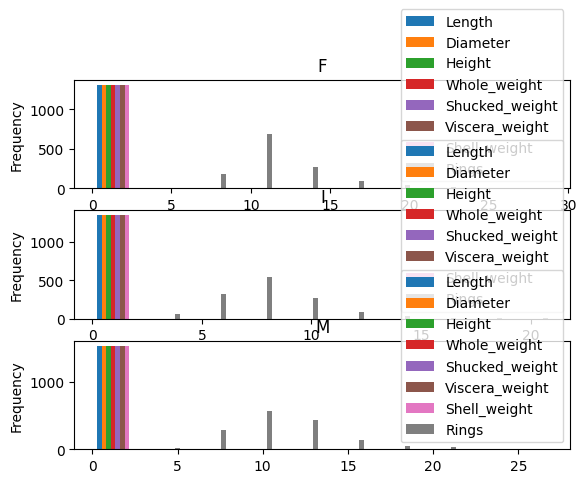

In [ ]:
_ = abalone.plot.hist("Sex")

Script:
* I am going to move on now.
* I am sure better charts are possible, but there are other ways to get better charts with less effort.
* I will say that this does seem to be work better if you are plotting just a single series.

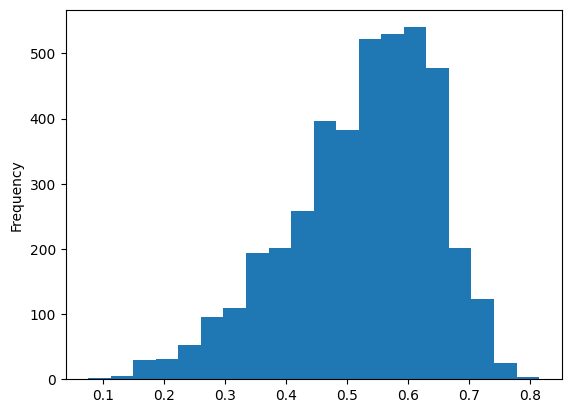

In [ ]:
_ = abalone["Length"].plot.hist(bins=20)

Script:
* There are a few arguments to label the charts.


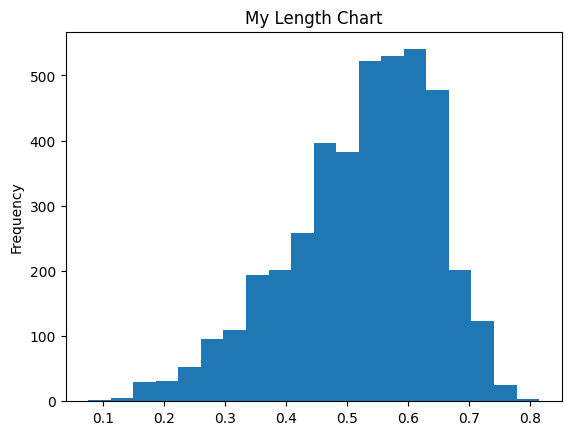

In [ ]:
_ = abalone['Length'].plot(kind='hist', bins=20, title='My Length Chart')

Script:
* These are features of Matplotlib, but just using Matplotlib, you would need multiple function calls to add them.
* If you try these plots with a dataframe, you get the messy charts combining columns again.

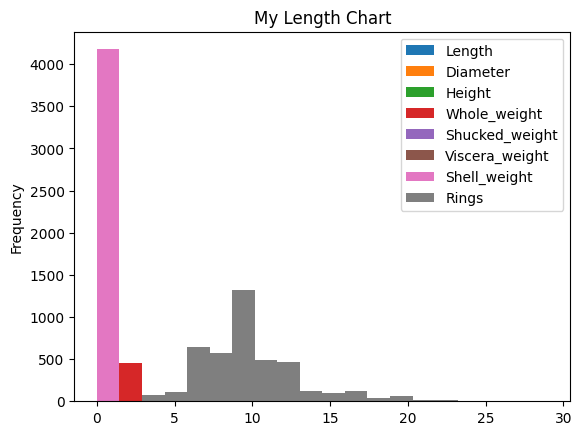

In [ ]:
_ = abalone.plot(kind='hist', bins=20, title='My Length Chart')

Script:
* These functions will work better if you limit the columns involved to columns with similar ranges of values.

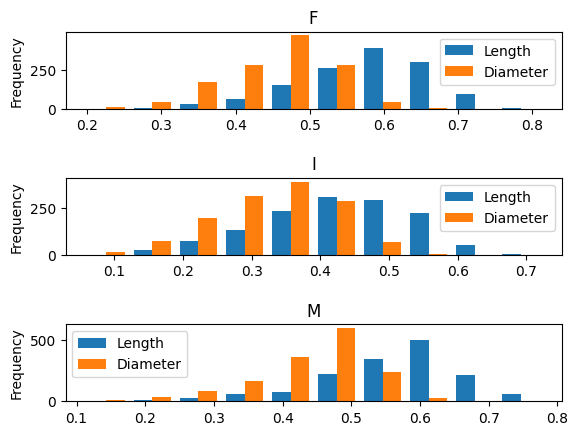

In [ ]:
_ = abalone.plot.hist(column=["Length", "Diameter"], by="Sex")
plt.subplots_adjust(hspace=0.9)

Script:
* Wrapping up, here is yet another way to plot histograms.

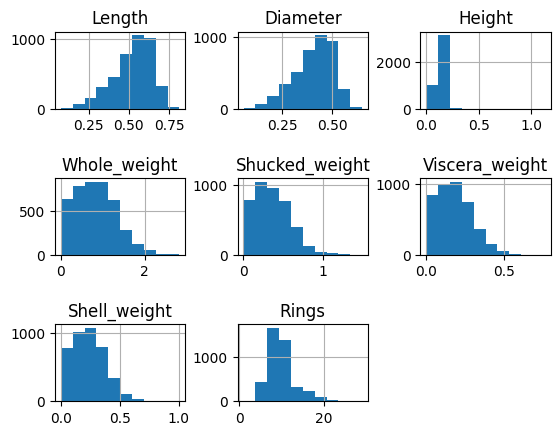

In [ ]:
pd.plotting.hist_frame(abalone)
plt.subplots_adjust(wspace=0.4, hspace=0.9)
None

Script:
* Pandas has a lot of ways to plot data, especially histograms.
* They are all pretty easy, but some of them are not very good choices for some datasets.
* Some choices are more reliable, like the ones with separate plots per column.
* Others that combine many columns into the same chart are not so reliable.
* I'd generally recommend to focus on one or two columns per time in each plot for clarity.